In [1]:
# Import Packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset used can be found at following kaggle link: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

In [3]:
# Import excel file into pandas DataFrame 

song_ranks = pd.read_excel('top10s.xlsx', names = ['ID', 'title', 'artist', 'genre', 'year', 'beats_per_minute', 'energy', 'danceability', 'loudness', 'liveness', 'valence', 'length', 'acousticness', 'speechiness', 'popularity'], index_col = 0)

In [4]:
song_ranks

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


In [5]:
song_ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
title               603 non-null object
artist              603 non-null object
genre               603 non-null object
year                603 non-null int64
beats_per_minute    603 non-null int64
energy              603 non-null int64
danceability        603 non-null int64
loudness            603 non-null int64
liveness            603 non-null int64
valence             603 non-null int64
length              603 non-null int64
acousticness        603 non-null int64
speechiness         603 non-null int64
popularity          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [6]:
# Change datatype of year from int to string & datatype of genre from string to categorical 

song_ranks.year = song_ranks.year.astype(str)
song_ranks.genre = song_ranks.genre.astype('category')
song_ranks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
title               603 non-null object
artist              603 non-null object
genre               603 non-null category
year                603 non-null object
beats_per_minute    603 non-null int64
energy              603 non-null int64
danceability        603 non-null int64
loudness            603 non-null int64
liveness            603 non-null int64
valence             603 non-null int64
length              603 non-null int64
acousticness        603 non-null int64
speechiness         603 non-null int64
popularity          603 non-null int64
dtypes: category(1), int64(10), object(3)
memory usage: 69.4+ KB


In [7]:
song_ranks.describe()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [8]:
# Check which song had beats_per_minute value of 0, song has value of 0 for almost all attributes 

song_ranks[song_ranks.beats_per_minute == 0]

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
443,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


In [9]:
song_ranks.loc[443,:]

title               Million Years Ago
artist                          Adele
genre                    british soul
year                             2016
beats_per_minute                    0
energy                              0
danceability                        0
loudness                          -60
liveness                            0
valence                             0
length                            227
acousticness                        0
speechiness                         0
popularity                          0
Name: 443, dtype: object

In [10]:
# Removing above song 

song_ranks_1 = song_ranks.drop(443, axis=0)

In [11]:
song_ranks_1.describe()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,118.742525,70.621262,64.486711,-5.488372,17.803987,52.312292,224.671096,14.350498,8.372093,66.631229
std,24.339497,16.068471,13.129357,1.704657,13.093347,22.430640,34.158310,20.775203,7.481608,14.273775
min,43.000000,4.000000,23.000000,-15.000000,2.000000,4.000000,134.000000,0.000000,3.000000,0.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,220.500000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.750000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [12]:
# Checking which songs have a acousticness value of 0, value is acceptable 

song_ranks_1[song_ranks_1.acousticness == 0]

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
19,Alejandro,Lady Gaga,dance pop,2010,99,80,63,-7,36,37,274,0,5,69
21,Meet Me Halfway,The Black Eyed Peas,dance pop,2010,130,63,80,-7,32,40,284,0,7,68
23,Take It Off,Kesha,dance pop,2010,125,68,73,-5,9,74,215,0,3,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,New Rules,Dua Lipa,dance pop,2018,116,70,76,-6,15,61,209,0,7,84
532,Friends (with BloodPop®),Justin Bieber,canadian pop,2018,105,73,74,-5,30,62,189,0,4,77
534,My My My!,Troye Sivan,dance pop,2018,103,46,70,-8,5,48,205,0,8,76


In [13]:
# Checking which songs have a popularity value of 0 as these songs should also be removed from the DataFrame

song_ranks_1[song_ranks_1.popularity == 0]

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
51,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
139,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
268,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
363,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0


In [14]:
song_ranks_2 = song_ranks_1.drop([51,139,268,363], axis=0)

In [15]:
song_ranks_2.describe()

,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,118.650502,70.588629,64.526756,-5.491639,17.757525,52.339465,224.658863,14.396321,8.391304,67.076923
std,24.140916,16.006845,13.152314,1.701048,13.099531,22.459123,34.154404,20.816623,7.500579,13.234799
min,43.000000,4.000000,23.000000,-15.000000,2.000000,4.000000,134.000000,0.000000,3.000000,7.000000
25%,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,220.500000,6.000000,5.000000,69.000000
75%,129.000000,82.000000,73.750000,-4.000000,24.000000,69.000000,239.000000,17.000000,9.000000,76.000000
max,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [16]:
# Looking into if same songs are listed multiple times in the same year 

song_ranks_2.title.value_counts().head(20)

Written in the Stars (feat. Eric Turner)           2
Castle Walls (feat. Christina Aguilera)            2
Company                                            2
The Hills                                          2
Love Yourself                                      2
I Like It                                          2
Sugar                                              2
Here                                               2
Marry You                                          2
We Are Never Ever Getting Back Together            2
All I Ask                                          2
First Time                                         2
Say Something                                      2
Stitches                                           2
Runnin' (Lose It All)                              2
Just the Way You Are                               2
A Little Party Never Killed Nobody (All We Got)    2
Kissing Strangers                                  2
Eenie Meenie                                  

In [17]:
repeat_titles = ("All I Ask", "We Are Never Ever Getting Back Together", "Stitches", "Written in the Stars (feat. Eric Turner)", "First Time", "Castle Walls (feat. Christina Aguilera)", "Say Something", "Marry You", "Love Yourself", "I Like It", "Just the Way You Are", "The Hills", "Sugar", "Runnin' (Lost It All)", "Company", "A Little Party Never Killed Nobody (All We Got)", "Here", "Kissing Strangers")

In [18]:
song_ranks_2[song_ranks_2.title.isin(repeat_titles)].sort_values(by = ['title'])

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
ID,,,,,,,,,,,,,,
240,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2014,130,62,76,-6,9,52,241,1,18,65
179,A Little Party Never Killed Nobody (All We Got),Fergie,dance pop,2013,130,62,76,-6,9,52,241,1,18,65
399,All I Ask,Adele,british soul,2016,142,28,59,-5,15,34,272,88,3,71
474,All I Ask,Adele,british soul,2017,142,28,59,-5,15,34,272,88,3,71
96,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2011,80,86,45,-5,26,58,329,7,39,49
49,Castle Walls (feat. Christina Aguilera),T.I.,atl hip hop,2010,80,86,45,-5,26,58,329,7,39,49
397,Company,Justin Bieber,canadian pop,2016,95,80,59,-5,8,43,208,13,6,72
302,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72
549,First Time,Kygo,edm,2018,90,59,63,-7,10,68,194,20,11,71


In [19]:
# Removing song "Sugar" by Maroon 5 to maintain consistency as it is listed twice in year 2015 with different popularity values

song_ranks_3 = song_ranks_2.drop([275, 323], axis=0)

In [23]:
song_ranks_3.shape

(596, 14)

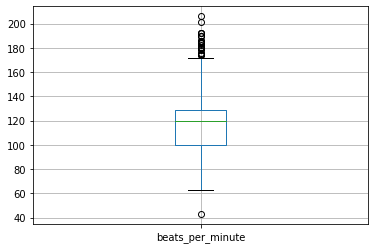

In [24]:
# Looking into distributions of numeric variables 

song_ranks_3.boxplot(column ='beats_per_minute')

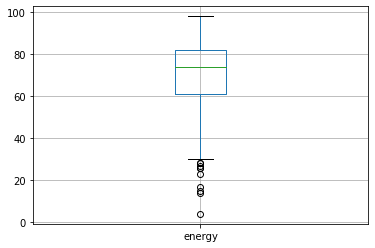

In [25]:
song_ranks_3.boxplot(column = 'energy')

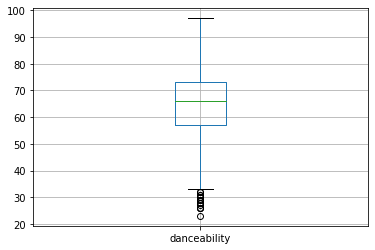

In [26]:
song_ranks_3.boxplot(column = 'danceability')

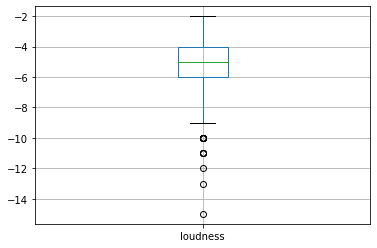

In [27]:
song_ranks_3.boxplot(column = 'loudness')

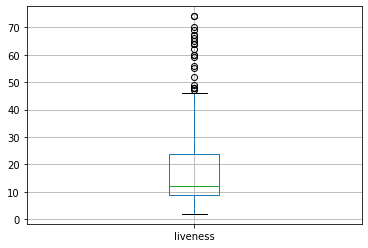

In [28]:
song_ranks_3.boxplot(column = 'liveness')

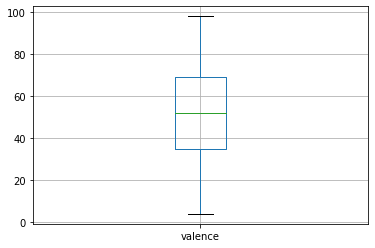

In [29]:
song_ranks_3.boxplot(column = 'valence')

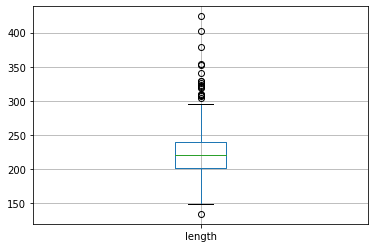

In [30]:
song_ranks_3.boxplot(column = 'length')

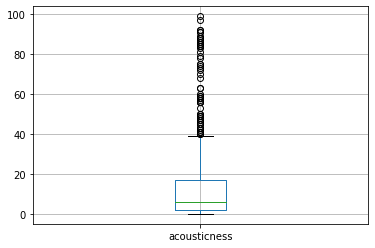

In [31]:
song_ranks_3.boxplot(column = 'acousticness')

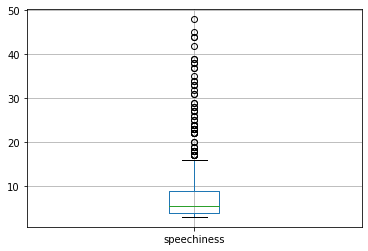

In [32]:
song_ranks_3.boxplot(column = 'speechiness')

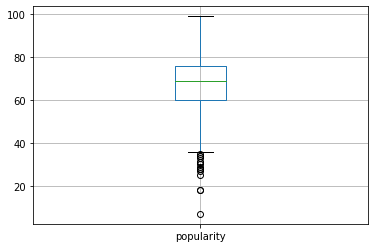

In [33]:
song_ranks_3.boxplot(column = 'popularity')

Text(0.5, 1.0, 'beats_per_minute vs popularity')

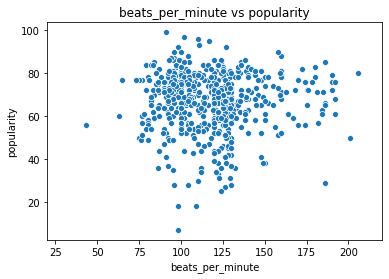

In [34]:
# Plotting beats_per_minute vs popularity, no significant correlation seen  

sns.scatterplot(x = song_ranks_3['beats_per_minute'], y = song_ranks_3['popularity'])
plt.xlim([20,220])
plt.title('beats_per_minute vs popularity')


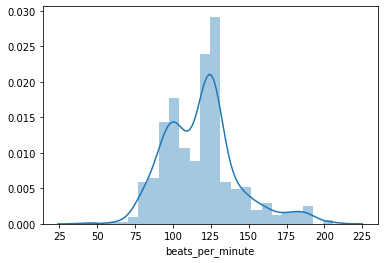

In [35]:
# Distribution of beats_per_minute 
#Bi-modal, beats_per_minute around 125 the most frequent in popular songs 

sns.distplot(song_ranks_3['beats_per_minute'])

Text(0.5, 1.0, 'energy vs popularity')

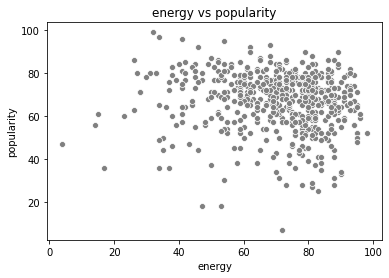

In [36]:
# Plotting energy vs popularity, slightly negative correlation 

sns.scatterplot(x = song_ranks_3['energy'], y = song_ranks_3['popularity'], color = 'gray' )
plt.title('energy vs popularity')

Text(0.5, 1.0, 'energy vs popularity')

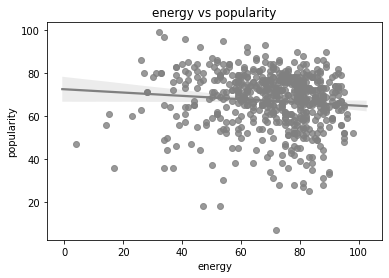

In [37]:
sns.regplot(x = song_ranks_3['energy'], y = song_ranks_3['popularity'], color = 'gray' )
plt.title('energy vs popularity')

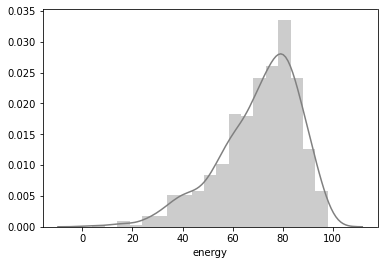

In [38]:
# Distribution of energy 
# Left skewed, energy around 80 the most frequent in popular songs

sns.distplot(song_ranks_3['energy'], color = 'gray')

Text(0.5, 1.0, 'danceability vs popularity')

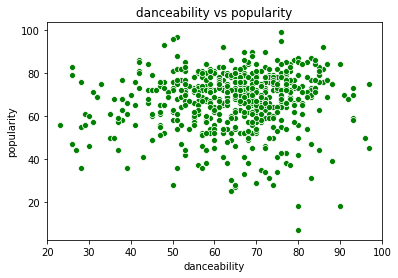

In [39]:
# Plotting danceability vs popularity, no significant correlation seen 

sns.scatterplot(x = song_ranks_3['danceability'], y = song_ranks_3['popularity'], color = 'green' )
plt.xlim([20,100])
plt.title('danceability vs popularity')

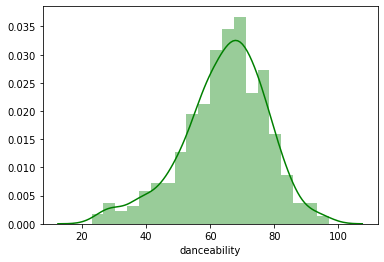

In [40]:
# Distribution of danceability 
# Close to normal distribution with danceability around 70 being the most frequent amongst popular songs 

sns.distplot(song_ranks_3['danceability'], color = 'green')

Text(0.5, 1.0, 'loudness vs popularity')

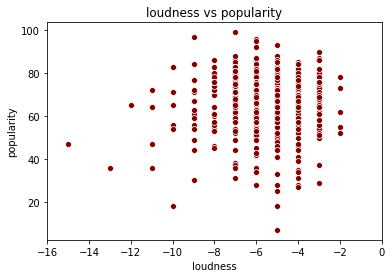

In [41]:
# Plotting loudness vs popularity, no significant correlation seen 

sns.scatterplot(x = song_ranks_3['loudness'], y = song_ranks_3['popularity'], color = 'maroon')
plt.xlim([-16,0])
plt.title('loudness vs popularity')

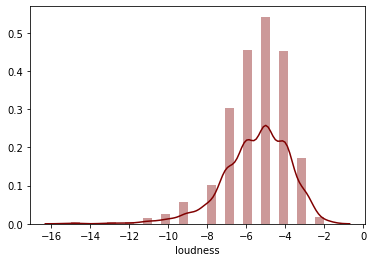

In [42]:
# Distribution of loudness
# Left skewed, loudness of -5 the most common amongst popular songs 

sns.distplot(song_ranks_3['loudness'], color = 'maroon')

Text(0.5, 1.0, 'liveness vs popularity')

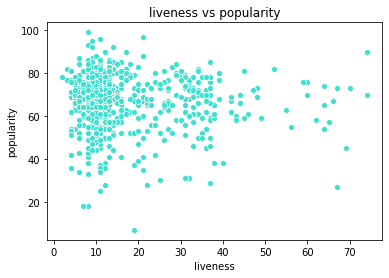

In [43]:
# Plotting liveness vs popularity, no significant correlation seen 

sns.scatterplot(x = song_ranks_3['liveness'], y = song_ranks_3['popularity'], color = 'turquoise')
plt.title('liveness vs popularity')

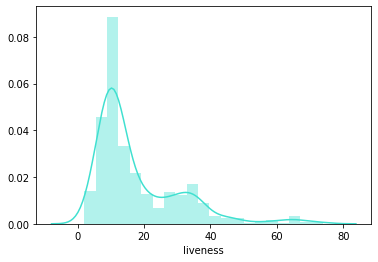

In [44]:
# Distributon of liveness
# Right skewed, liveness around 10 the most frequent amongst popular songs 

sns.distplot(song_ranks_3['liveness'], color = 'turquoise')

Text(0.5, 1.0, 'valence vs popularity')

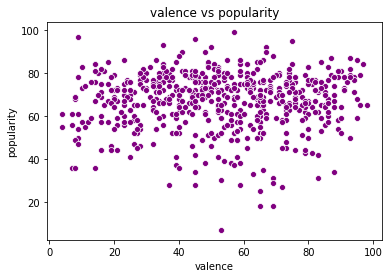

In [45]:
# Plotting valence vs popularity, no significant correlation seen 

sns.scatterplot(x = song_ranks_3['valence'], y = song_ranks_3['popularity'], color = 'purple')
plt.title('valence vs popularity')

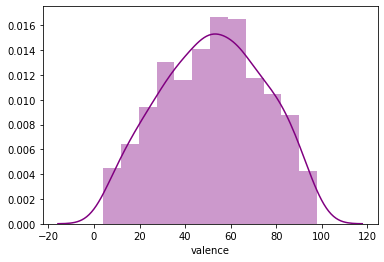

In [46]:
# Distribution of valence 
# Close to normal distribution w/ wide spread, valence around 60 is most frequent amongst popular songs 

sns.distplot(song_ranks_3['valence'], color = 'purple')

Text(0.5, 1.0, 'length vs popularity')

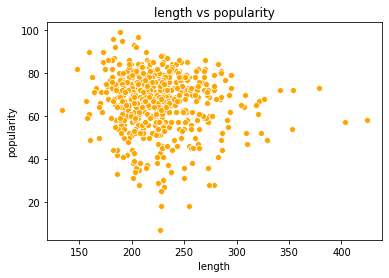

In [47]:
# Plotting length vs popularity, slightly negative correlation 

sns.scatterplot(x = song_ranks_3['length'], y = song_ranks_3['popularity'], color = 'orange')
plt.title('length vs popularity')

Text(0.5, 1.0, 'length vs popularity')

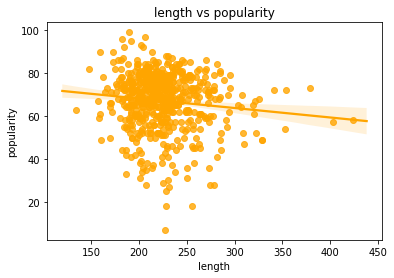

In [48]:
sns.regplot(x = song_ranks_3['length'], y = song_ranks_3['popularity'], color = 'orange')
plt.title('length vs popularity')

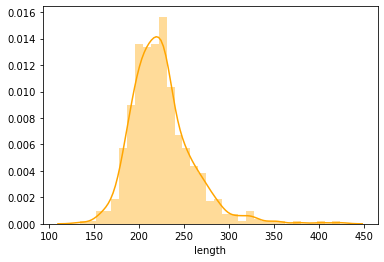

In [49]:
# Distribution of length 
# Right skewed, length around 225 most common for popular songs 

sns.distplot(song_ranks_3['length'], color = 'orange')

Text(0.5, 1.0, 'acousticness vs popularity')

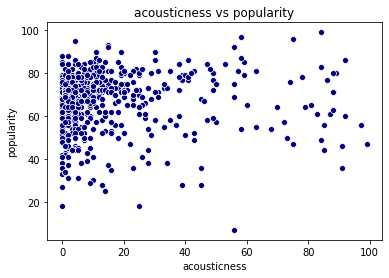

In [50]:
# Plotting acousticness vs popularity, no significant correlation seen 

sns.scatterplot(x = song_ranks_3['acousticness'], y = song_ranks_3['popularity'], color = 'navy')
plt.title('acousticness vs popularity')

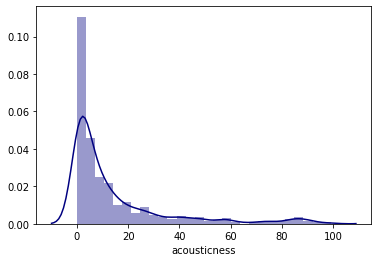

In [51]:
# Distribution of acousticness 
# Right skewed, acousticness of 0 very frequent amongst popular songs 

sns.distplot(song_ranks_3['acousticness'], color = 'navy')

Text(0.5, 1.0, 'speechiness vs popularity')

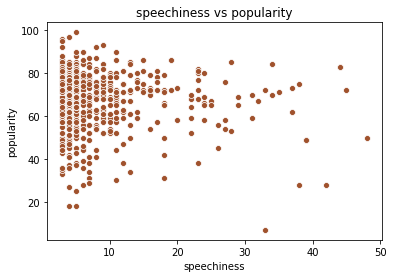

In [52]:
# Plotting speechiness vs popularity, no significant correlation seen 

sns.scatterplot(x = song_ranks_3['speechiness'], y = song_ranks_3['popularity'], color = 'sienna')
plt.title('speechiness vs popularity')

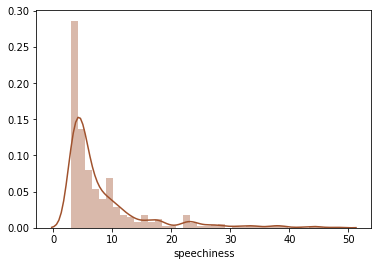

In [53]:
# Distribution of speechiness
# Right skewed, speechiness close to 5 most common amongst popular songs 

sns.distplot(song_ranks_3['speechiness'], color = 'sienna')

In [54]:
# Seeing number of popular songs per year in dataset
# Range of popular songs included per year from 31 (2019) to 92(2015)

song_ranks_3.groupby('year').count()

,title,artist,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
year,,,,,,,,,,,,,
2010,50,50,50,50,50,50,50,50,50,50,50,50,50
2011,53,53,53,53,53,53,53,53,53,53,53,53,53
2012,34,34,34,34,34,34,34,34,34,34,34,34,34
2013,71,71,71,71,71,71,71,71,71,71,71,71,71
2014,57,57,57,57,57,57,57,57,57,57,57,57,57
2015,92,92,92,92,92,92,92,92,92,92,92,92,92
2016,79,79,79,79,79,79,79,79,79,79,79,79,79
2017,65,65,65,65,65,65,65,65,65,65,65,65,65
2018,64,64,64,64,64,64,64,64,64,64,64,64,64


In [55]:
# Looking into how numeric variables varied by year 
# Songs have had increasing popularity in recent years 

song_ranks_3.groupby('year')['popularity'].mean()

year
2010    65.540000
2011    61.867925
2012    69.764706
2013    63.985915
2014    63.807018
2015    65.076087
2016    64.974684
2017    69.015385
2018    72.437500
2019    84.354839
Name: popularity, dtype: float64

In [56]:
# beats_per_minute decreased over past decade 

song_ranks_3.groupby('year')['beats_per_minute'].mean()

year
2010    121.940000
2011    119.075472
2012    121.294118
2013    121.676056
2014    123.649123
2015    118.869565
2016    115.772152
2017    116.800000
2018    114.593750
2019    112.451613
Name: beats_per_minute, dtype: float64

In [57]:
# energy decreased over past decade 

song_ranks_3.groupby('year')['energy'].mean()

year
2010    77.500000
2011    74.886792
2012    75.000000
2013    73.873239
2014    67.684211
2015    70.489130
2016    68.088608
2017    69.169231
2018    65.468750
2019    64.741935
Name: energy, dtype: float64

In [58]:
# No discernible pattern for danceability except for recent increase 

song_ranks_3.groupby('year')['danceability'].mean()

year
2010    64.480000
2011    63.641509
2012    65.882353
2013    62.042254
2014    62.596491
2015    63.586957
2016    64.126582
2017    65.369231
2018    67.203125
2019    69.709677
Name: danceability, dtype: float64

In [59]:
# No discernible pattern for loudness 

song_ranks_3.groupby('year')['loudness'].mean()

year
2010   -4.940000
2011   -5.018868
2012   -4.911765
2013   -5.140845
2014   -5.771930
2015   -5.565217
2016   -6.037975
2017   -5.615385
2018   -5.671875
2019   -5.774194
Name: loudness, dtype: float64

In [60]:
# liveness has had up & down variations but decreased over past decade 

song_ranks_3.groupby('year')['liveness'].mean()

year
2010    21.400000
2011    20.943396
2012    15.558824
2013    19.718310
2014    16.929825
2015    18.423913
2016    17.962025
2017    15.369231
2018    14.750000
2019    15.161290
Name: liveness, dtype: float64

In [61]:
# valence has had up & down variations but decreased over past decade

song_ranks_3.groupby('year')['valence'].mean()

year
2010    57.240000
2011    53.698113
2012    63.852941
2013    53.183099
2014    52.192982
2015    52.032609
2016    45.721519
2017    52.276923
2018    48.765625
2019    50.806452
Name: valence, dtype: float64

In [62]:
# length decreased over past decade overall after initial increases 

song_ranks_3.groupby('year')['length'].mean()

year
2010    230.580000
2011    242.566038
2012    223.470588
2013    234.492958
2014    223.421053
2015    223.445652
2016    220.139241
2017    222.169231
2018    217.187500
2019    200.645161
Name: length, dtype: float64

In [63]:
# acoustincness has had up & down variations over past decade 

song_ranks_3.groupby('year')['acousticness'].mean()

year
2010    11.840000
2011    13.339623
2012     5.000000
2013    10.323944
2014    17.385965
2015    16.989130
2016    16.075949
2017    16.600000
2018    12.781250
2019    21.741935
Name: acousticness, dtype: float64

In [64]:
# No discernible pattern for speechiness 

song_ranks_3.groupby('year')['speechiness'].mean()

year
2010    9.000000
2011    9.660377
2012    5.852941
2013    8.309859
2014    8.719298
2015    7.119565
2016    8.468354
2017    9.784615
2018    8.625000
2019    8.129032
Name: speechiness, dtype: float64

In [65]:
# Looking into which artists had the most number of popular songs

song_ranks_3['artist'].value_counts().head(20)

Katy Perry           17
Justin Bieber        16
Rihanna              15
Lady Gaga            14
Maroon 5             13
Bruno Mars           13
The Chainsmokers     11
Shawn Mendes         11
Ed Sheeran           11
Pitbull              11
Jennifer Lopez       10
Calvin Harris        10
Ariana Grande         9
Kesha                 9
Britney Spears        9
David Guetta          9
OneRepublic           9
Adele                 9
Selena Gomez          8
Justin Timberlake     8
Name: artist, dtype: int64

In [66]:
# Seeing which genres had the most number of popular songs
# Songs belonging to/associated with the pop genre make up a disproportionate amount of the dataset
# Could be difficult to differentiate effect of genre within this dataset due to disproportion

song_ranks_3['genre'].value_counts().head(20)

dance pop                    324
pop                           58
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  10
big room                       9
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
hip pop                        6
australian dance               6
complextro                     6
australian pop                 5
edm                            5
atl hip hop                    5
hip hop                        4
latin                          4
permanent wave                 4
Name: genre, dtype: int64

In [67]:
# Changing datatype of title to string as certain titles contain numeric & non-letter characters
song_ranks_3.title =  song_ranks_3.title.astype(str)

In [68]:
song_ranks_3.title.sort_values().head(50)

ID
200                                           #Beautiful
241                                              #SELFIE
174                                           #thatPOWER
570                   ...Ready For It? - BloodPop® Remix
88                                                   1+1
482                                            24K Magic
559                             2U (feat. Justin Bieber)
31                                                     3
298                                                43776
373                                              7 Years
508                                          A L I E N S
179      A Little Party Never Killed Nobody (All We Got)
240      A Little Party Never Killed Nobody (All We Got)
251                                  A Sky Full of Stars
52                                      A Thousand Years
227                                            Adore You
392                                      Ain't Your Mama
19                          

In [69]:
# Looking into the most frequently occuring words in popular song titles
# Songs with a feature by another artist or songs relating to 'you', 'me', 'love' occur the most within this dataset 

popular_words = pd.Series(' '.join(song_ranks_3['title']).lower().split()).value_counts()

In [70]:
popular_words.head(50)

(feat.        79
the           59
you           58
-             50
me            43
love          40
i             30
&             25
it            23
of            20
like          20
to            20
my            16
we            16
(with         16
a             15
edit          13
what          13
remix         13
from          13
in            12
radio         12
don't         12
your          11
on            10
are            9
for            8
let            8
do             8
all            8
one            8
never          8
soundtrack     7
up             7
night          7
version        7
go             7
this           7
heart          6
motion         6
be             6
just           6
picture        6
la             6
way            6
young          5
want           5
again          5
how            5
song           5
dtype: int64